#Tarea 2
Integrantes:
*   Raúl Álvarez
*   Cristian Bernal
*   Nicole Gallardo
*   Diego Muñoz
*   Bastián Vivar

Profesor: Juan Pavez

Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pylab as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.cluster import KMeans
from scipy import stats

import zipfile
import os
# from keras.preprocessing.image import load_img, ImageDataGenerator
import tensorflow as tf

# warnings.filterwarnings('ignore')

#Tarea 2-1

In [2]:

df_training = pd.read_csv("training.csv")
df_test = pd.read_csv("test.csv")

weight_test = df_test["Weight"]

In [3]:
df_test

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.380904,b,b,11.246677
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-0.553,-0.849,-999.000,-999.000,-999.000,47.575,0.782046,b,v,1.421938
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.005721,s,v,0.010415
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.005721,s,v,0.010415
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-1.013,-0.334,185.857,0.335,2.587,599.213,0.091770,b,v,0.166859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549995,899995,309.530,28.185,170.795,99.349,-999.000,-999.000,-999.000,3.061,2.367,...,-1.759,-0.733,-999.000,-999.000,-999.000,97.451,0.443598,b,v,0.806562
549996,899996,105.653,5.096,77.256,33.040,-999.000,-999.000,-999.000,2.693,33.040,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.512740,b,v,0.932279
549997,899997,-999.000,69.470,51.766,1.189,-999.000,-999.000,-999.000,1.615,1.189,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.218960,b,v,2.216349
549998,899998,107.254,13.500,79.833,50.801,-999.000,-999.000,-999.000,2.026,7.993,...,-0.352,-2.594,-999.000,-999.000,-999.000,43.099,0.000814,s,v,0.001483


In [4]:
df_test.columns.values

array(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet',
       'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep',
       'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau',
       'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet',
       'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta',
       'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi',
       'PRI_jet_all_pt', 'Weight', 'Label', 'KaggleSet', 'KaggleWeight'],
      dtype=object)

In [5]:

def calc_metrics(model, X_test, y_test,weight_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True)
    macro_prec = precision_score(y_test, y_pred, average='macro')
    macro_rec = recall_score(y_test, y_pred, average='macro')
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    Ams = scoreams(y_test, y_pred,weight_test)
    return acc, macro_prec, macro_rec, macro_f1,Ams

def tune_params(model, param_dist, n_iter_search, X_v, y_v):
  random_search = RandomizedSearchCV(
      model, param_distributions=param_dist, n_iter=n_iter_search, scoring='f1_macro', random_state=2022
  )
  res = random_search.fit(X_v, y_v)
  return res
def conf_matrix(trained_model, X_test, y_test, title):
    labels = ['b', 's']
    y_pred = trained_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=trained_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
    disp.plot()
    plt.title(title)
    plt.show()
def scoreams(y_true, y_pred, weights=weight_test):  
  b = 0
  s = 0

  for i in range(len(y_true)):
    if y_true[i] == 1 and y_pred[i] == 1:
      s += weights[i]
    elif y_true[i] == 0 and y_pred[i] == 1:
      b += weights[i]
  # print(y_pred)
  print(s)
  print(b)
  return ((2*(((s+b+10)*np.log(1+(s/(b+10)))-s)))**(1/2))
#SVC tuning


In [6]:
df_training["Label"]

0         s
1         b
2         b
3         b
4         b
         ..
249995    b
249996    b
249997    s
249998    b
249999    b
Name: Label, Length: 250000, dtype: object

In [7]:
df_training = df_training.drop(["PRI_jet_subleading_phi","PRI_jet_subleading_eta","PRI_jet_subleading_pt",
                            "PRI_jet_leading_phi","PRI_jet_leading_eta","PRI_jet_leading_pt","DER_lep_eta_centrality","DER_prodeta_jet_jet",
                            "DER_mass_jet_jet","DER_deltaeta_jet_jet","DER_mass_MMC","Weight"], axis=1)
                            
df_test = df_test.drop(["PRI_jet_subleading_phi","PRI_jet_subleading_eta","PRI_jet_subleading_pt",
                            "PRI_jet_leading_phi","PRI_jet_leading_eta","PRI_jet_leading_pt","DER_lep_eta_centrality","DER_prodeta_jet_jet",
                            "DER_mass_jet_jet","DER_deltaeta_jet_jet","DER_mass_MMC","Weight", 'KaggleSet', 'KaggleWeight'], axis=1)

In [8]:
df_training.columns

Index(['EventId', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_all_pt', 'Label'],
      dtype='object')

In [9]:
df_test.columns

Index(['EventId', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_all_pt', 'Label'],
      dtype='object')

In [10]:
# df_training.drop([ "DER_mass_MMC","DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet",
# ,"DER_lep_eta_centrality","PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi",
# ,"PRI_jet_subleading_pt","PRI_jet_subleading_eta","PRI_jet_subleading_phi"], axis=1)

df_train, df_val = train_test_split(df_training, test_size=0.002, random_state=2022)

y_train = df_train["Label"]
y_val = df_val["Label"]
y_test = df_test["Label"]

df_train = df_train.drop(["Label"], axis=1)
df_val = df_val.drop(["Label"], axis=1)
df_test = df_test.drop(["Label"], axis=1)

df_train = StandardScaler().fit_transform(df_train)
df_val = StandardScaler().fit_transform(df_val)
df_test = StandardScaler().fit_transform(df_test)

y_train = y_train.apply(lambda x : 1 if (x == "s") else(0))
y_vald = y_val.apply(lambda x : 1 if (x == "s") else(0))
y_test = y_test.apply(lambda x : 1 if (x == "s") else(0))

# Y_train = df_training["Label"]
# y = df_test.loc[:, ["Label"]].values

In [11]:
print(y_test)

0         0
1         0
2         1
3         1
4         0
         ..
549995    0
549996    0
549997    0
549998    1
549999    0
Name: Label, Length: 550000, dtype: int64


In [12]:
n_iter_search = 100
Tree_param_dist = {
        'criterion': ['giny', 'entropy', 'log_loss'],
        'splitter': ['best', 'random'],
        'max_features': ['sqrt', 'log2'],
        'ccp_alpha': stats.uniform(0, 1e-1)
    }
# n_iter_search = 100
model = DecisionTreeClassifier()
res = tune_params(model, Tree_param_dist, n_iter_search, df_train, y_train)
best_parameters_Tree = res.best_params_

c:\Users\basti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\basti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\basti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "c:\Users\basti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", l

In [13]:
Tree_clf = DecisionTreeClassifier(**best_parameters_Tree, random_state=2022)
print(Tree_clf.fit(df_train,y_train))

acc_tree, macro_prec_tree, macro_rec_tree, macro_f1_tree, ams = calc_metrics(Tree_clf, df_test,y_test,weight_test)

DecisionTreeClassifier(ccp_alpha=0.002093154791445695, criterion='log_loss',
                       max_features='log2', random_state=2022)
232.76255871849506
24133.00679110159


In [14]:
print(acc_tree, macro_prec_tree, macro_rec_tree, macro_f1_tree,ams)

0.7324436363636364 0.7013930462754384 0.6831253959257075 0.6894148746767973 1.4956219754280706


In [15]:
n_iter_search = 100
SVC_param_dist = {
        'penalty': ['l1', 'l2'],
        # 'loss': ['hinge', 'squared_hinge'],
        'dual': [True, False],
        'tol': stats.uniform(0, 1e-3),
        'C': stats.uniform(0.9, 1.1),
        'fit_intercept': [True, False],
        'intercept_scaling': stats.uniform(0.9, 1.1),
    }
# n_iter_search = 100
model = LinearSVC()
res = tune_params(model, SVC_param_dist, n_iter_search, df_train, y_train)
best_parameters_SVC = res.best_params_

c:\Users\basti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\basti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\basti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\basti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\basti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

In [16]:
SVC_clf = LinearSVC(**best_parameters_SVC, random_state=2022)
print(SVC_clf.fit(df_train,y_train))

acc_SVC, macro_prec_SVC, macro_rec_SVC, macro_f1_SVC, amsSVC = calc_metrics(SVC_clf, df_test,y_test,weight_test)

c:\Users\basti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1.5934890866723852, fit_intercept=False,
          intercept_scaling=1.3321436699814382, random_state=2022,
          tol=0.0002931683323752639)
382.30160512178946
59711.237825830816


In [17]:
print(acc_SVC, macro_prec_SVC, macro_rec_SVC, macro_f1_SVC, amsSVC)

0.7070327272727273 0.7120111065867969 0.7355523489461728 0.700861070887298 1.5627134688499893


In [ ]:
from sklearn.ensemble import RandomForestClassifier

Rf_clf = RandomForestClassifier(max_depth=10, random_state=0)
print(Rf_clf.fit(df_train, y_train))

acc_Rf, macro_prec_Rf, macro_rec_Rf, macro_f1_Rf, amsRf = calc_metrics(Rf_clf, df_test,y_test,weight_test)
print(acc_Rf, macro_prec_Rf, macro_rec_Rf, macro_f1_Rf, amsRf)

RandomForestClassifier(max_depth=10, random_state=0)
302.26977213787137
18087.306549702076


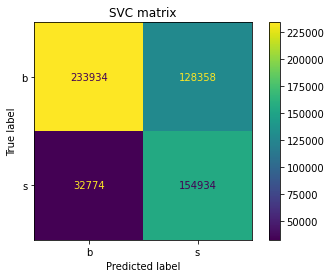

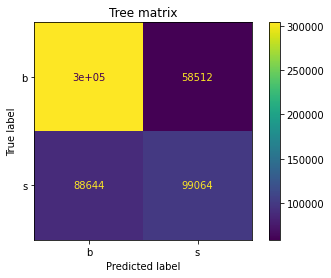

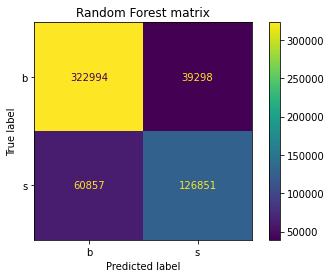

In [19]:
conf_matrix(SVC_clf, df_test, y_test, "SVC matrix")
conf_matrix(Tree_clf, df_test, y_test, "Tree matrix")
conf_matrix(Rf_clf, df_test, y_test, "Random Forest matrix")

In [20]:
# n_iter_search = 30

# # modelVecinos = KNeighborsClassifier(n_neighbors=3)
# resultadosKnn = []
# resultadosKmean2 = []
# resultadosKmean4 = []

# # res = tune_params(modelVecinos, vecinos_param_dist, n_iter_search, dfValdx, dfValdy)
# # best_parameters_knn = res.best_params_
# Knn_clf = KNeighborsClassifier(n_neighbors=7)
# Knn_clf.fit(df_train,y_train)

# acc_kkk, macro_prec_kkk, macro_rec_kkk, macro_f1_kkk = calc_metrics(Knn_clf, dfValdx,dfValdy)
# resultadosKnn.append([acc_kkk, macro_prec_kkk, macro_rec_kkk, macro_f1_kkk])

# dfValdy2 = dfValdy.apply(lambda x : 1 if (x == "s") else(0))

# Kmean_clf_2 = KMeans(n_clusters=2, random_state=0)
# Kmean_clf_2.fit(dfValdx,dfValdy2)
# acc_kkk, macro_prec_kkk, macro_rec_kkk, macro_f1_kkk = calc_metrics(Kmean_clf_2, dfValdx,dfValdy2)
# resultadosKmean2.append([acc_kkk, macro_prec_kkk, macro_rec_kkk, macro_f1_kkk])

# Kmean_clf_4 = KMeans(n_clusters=4, random_state=0)
# Kmean_clf_4.fit(dfValdx,dfValdy2)
# acc_kkk, macro_prec_kkk, macro_rec_kkk, macro_f1_kkk = calc_metrics(Kmean_clf_4, dfValdx,dfValdy2)
# resultadosKmean4.append([acc_kkk, macro_prec_kkk, macro_rec_kkk, macro_f1_kkk])
    

# Tarea 2-2: Implementación Redes Neuronales Profundas


In [21]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [22]:
higgs_train = pd.read_csv("training.csv")
higgs_test  = pd.read_csv("test.csv")

print('Número de datos de entrenamiento: {} \nNúmero de datos de prueba: {}'.format(len(higgs_train), len(higgs_test)))

Número de datos de entrenamiento: 250000 
Número de datos de prueba: 550000


In [23]:
higgs_train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [24]:
higgs_test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.380904,b,b,11.246677
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-0.553,-0.849,-999.000,-999.000,-999.000,47.575,0.782046,b,v,1.421938
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.005721,s,v,0.010415
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.005721,s,v,0.010415
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-1.013,-0.334,185.857,0.335,2.587,599.213,0.091770,b,v,0.166859


In [25]:
#La columna EventId no aporta ninguna informacion por lo que la eliminamos. 
higgs_train.drop(columns=["EventId"], inplace=True)
higgs_test.drop(columns=["EventId"], inplace=True)

#La columna Weights no es usada para la prediccion del label pero se utilizara para el calculo del puntaje conseguido
weight_train = higgs_train.pop("Weight")
weight_test = higgs_test.pop("Weight")

#Las columnas KaggleSet y KaggleWeight son originarias de la pagina Kaggle por lo tanto no utiles
#para nosotros
higgs_test.drop(columns=["KaggleSet","KaggleWeight"], inplace=True)

<AxesSubplot:xlabel='Label', ylabel='count'>

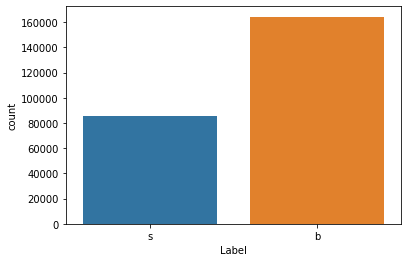

In [26]:
#targets en la data de entrenamiento
sns.countplot(higgs_train['Label'],label="Count")

<AxesSubplot:xlabel='Label', ylabel='count'>

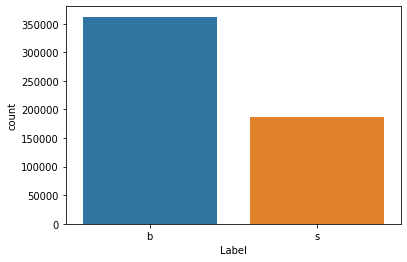

In [27]:
#targets en la data de prueba
sns.countplot(higgs_test['Label'],label="Count")

In [28]:
#división features y target
#estandarización de los features

#Training Data
train_x = higgs_train.iloc[:,:30]
train_x = StandardScaler().fit_transform(train_x)
print("Training Data :", train_x.shape)

test_x = higgs_test.iloc[:,:30]
test_x = StandardScaler().fit_transform(test_x)
print("Testing Data :", test_x.shape)

Training Data : (250000, 30)
Testing Data : (550000, 30)


In [29]:
#división features y target
#labeling de los targets (0 si es background, 1 si es una señal)

#Training Data
train_y = higgs_train.iloc[:,30]
train_y = LabelEncoder().fit_transform(train_y)
print("Training Data :", train_y.shape)

# Testing Data
test_y = higgs_test.iloc[:,30]
test_y = LabelEncoder().fit_transform(test_y)
print("Testing Data :", test_y.shape)

Training Data : (250000,)
Testing Data : (550000,)


## Score dataset

In [30]:
def score(y_true, y_pred, weights=weight_test):  
  b = 0
  s = 0

  for i in range(len(y_true)):
    if y_true[i] == 1 and y_pred[i] == 1:
      s += weights[i]
    elif y_true[i] == 0 and y_pred[i] == 1:
      b += weights[i]
      
  return (2*(((s+b+10)*np.log(1+(s/(b+10)))-s)))**(1/2)

## Funciones de activación utilizadas



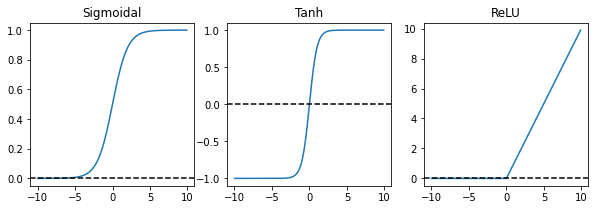

In [31]:
def miReLU(x, alpha=1.):
    return x*(x>0)

def miSigm(x):
  return 1/(1+(np.e**-x))
   
x = np.array(range(-100,100))/10.

yReLU = miReLU(x)
ySigm = miSigm(x)
yTanh = np.tanh(x)

plt.figure(figsize=(10,3))
plt.subplot(131)
plt.plot(x, ySigm)
plt.axhline(0, linestyle='--', color='k')
plt.title('Sigmoidal')

plt.subplot(132)
plt.plot(x, yTanh)
plt.axhline(0, linestyle='--', color='k')
plt.title('Tanh')

plt.subplot(133)
plt.plot(x, yReLU)
plt.axhline(0, linestyle='--', color='k')
plt.title('ReLU')

plt.show()

## Tratamiento del balanceo

In [32]:
class_weight = {0: 1.,
                1: .5}

## Red Neuronal de 1 Capa Oculta

### Versión 1:

- No regularization layers
- Optimizer: Gradient descent (with momentum) optimizer
- No normalization layers
- Batch size: 1000
- No dropout layers
- Full data

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(30,)), #input
    tf.keras.layers.Dense(60, activation=tf.nn.relu), #hidden1
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) #output
])

model.compile(optimizer='SGD',
              loss='binary_crossentropy')

history = model.fit(train_x, train_y, epochs=100, batch_size=1000, class_weight=class_weight)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4493
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3762
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3626
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3544
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3489
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3448
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3414
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3384
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3358
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3333
Epoch 11/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3309
Epoch 12/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3286
Epoch 13/100


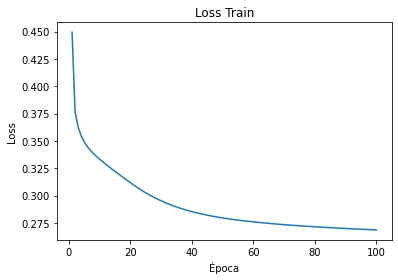

In [34]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [35]:
predictions = model.predict(test_x)

17188/17188 [==============================] - 13s 748us/step


In [36]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [37]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.46251714343655


### Versión 2:

- No regularization layers
- Optimizer: Gradient descent (with momentum) optimizer
- No normalization layers
- Batch size: 1000
- No dropout layers
- Reduced data to 15 features

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(15,)), #input
    tf.keras.layers.Dense(30, activation=tf.nn.relu), #hidden1
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) #output
])

model.compile(optimizer='SGD',
              loss='binary_crossentropy')

PCA = sklearnPCA(n_components=15).fit(train_x)
PCA_train = PCA.transform(train_x)

history = model.fit(PCA_train, train_y, epochs=100, batch_size=1000, class_weight=class_weight)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.4599
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3811
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3694
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3620
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3568
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3528
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3494
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3464
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3435
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3408
Epoch 11/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3381
Epoch 12/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3355
Epoch 13/100


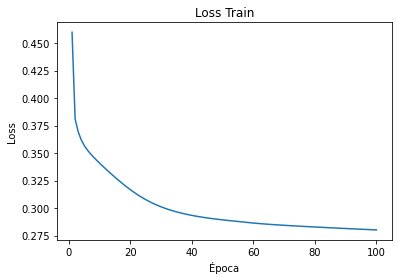

In [39]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [40]:
PCA_test = PCA.transform(test_x)
predictions = model.predict(PCA_test)

17188/17188 [==============================] - 13s 741us/step


In [41]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [42]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.305719199508894


### Versión 3:

- Regularization layer: Gaussian Noise (mean = 0)
- Optimizer: Gradient descent (with momentum) optimizer
- No normalization layers
- Batch size: 1000
- No dropout layers
- Reduced data to 15 features

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(15,), stddev=0),
    tf.keras.layers.Dense(30, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer='SGD',
              loss='binary_crossentropy')

PCA = sklearnPCA(n_components=15).fit(train_x)
PCA_train = PCA.transform(train_x)

history = model.fit(PCA_train, train_y, epochs=100, batch_size=1000, class_weight=class_weight)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4212
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3852
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3725
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3647
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3593
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3552
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3519
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3490
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3464
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3441
Epoch 11/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3419
Epoch 12/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3398
Epoch 13/100


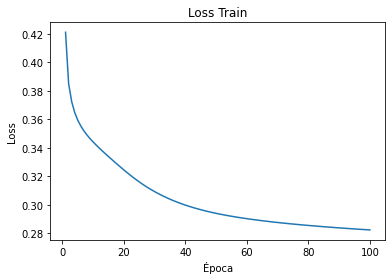

In [44]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [45]:
PCA_test = PCA.transform(test_x)
predictions = model.predict(PCA_test)

17188/17188 [==============================] - 13s 749us/step


In [46]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [47]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.3290194115520118


### Versión 4:

- Regularization layer: Gaussian Noise (mean = 0)
- Optimizer: Adam
- No normalization layers
- Batch size: 5000
- No dropout layers
- Reduced data to 15 features

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(15,), stddev=0),
    tf.keras.layers.Dense(30, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer='Adam',
              loss='binary_crossentropy')

PCA = sklearnPCA(n_components=15).fit(train_x)
PCA_train = PCA.transform(train_x)

history = model.fit(PCA_train, train_y, epochs=100, batch_size=5000, class_weight=class_weight)

Epoch 1/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5184
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3854
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3587
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3468
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3381
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3304
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3229
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3157
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3090
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3030
Epoch 11/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2978
Epoch 12/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2935
Epoch 13/100
50/50 [=================

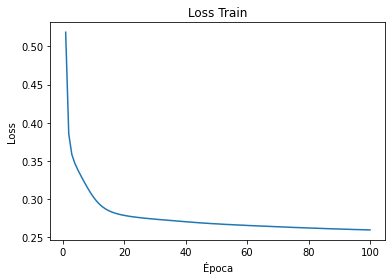

In [49]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [50]:
PCA_test = PCA.transform(test_x)
predictions = model.predict(PCA_test)

17188/17188 [==============================] - 14s 805us/step


In [51]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [52]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.5032577858393883


### Versión 5:

- Regularization layer: Gaussian Noise (mean = 0)
- Optimizer: Adam
- No normalization layers
- Batch size: 2500
- No dropout layers
- Reduced data to 10 features

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(10,), stddev=0),
    tf.keras.layers.Dense(30, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer='Adam',
              loss='binary_crossentropy')

PCA = sklearnPCA(n_components=10).fit(train_x)
PCA_train = PCA.transform(train_x)

history = model.fit(PCA_train, train_y, epochs=100, batch_size=2500, class_weight=class_weight)

Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 0.4586
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3580
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3434
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3336
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3271
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3233
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3210
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3195
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3183
Epoch 10/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3174
Epoch 11/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3166
Epoch 12/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3159
Epoch 13/100


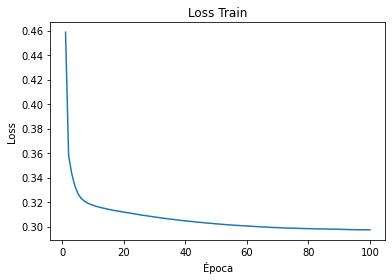

In [54]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [55]:
PCA_test = PCA.transform(test_x)
predictions = model.predict(PCA_test)

17188/17188 [==============================] - 12s 717us/step


In [56]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [57]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.1435196953087012


## Red Neuronal de 3 Capas Ocultas

### Versión 1:

- No regularization layers
- Optimizer: Adam
- No normalization layers
- Batch size: 5000
- Droput layer of rate: .2
- Full data

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(30,)), #input
    tf.keras.layers.Dense(60, activation=tf.nn.relu), #hidden1
    tf.keras.layers.Dropout(.2), #hidden2
    tf.keras.layers.Dense(90, activation=tf.nn.tanh), #hidden3
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) #output
])

model.compile(optimizer='Adam',
              loss='binary_crossentropy')

history = model.fit(train_x, train_y, epochs=100, batch_size=5000, class_weight=class_weight)

Epoch 1/100
50/50 [==============================] - 1s 7ms/step - loss: 0.3867
Epoch 2/100
50/50 [==============================] - 0s 8ms/step - loss: 0.3305
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 0.3095
Epoch 4/100
50/50 [==============================] - 0s 8ms/step - loss: 0.2935
Epoch 5/100
50/50 [==============================] - 0s 7ms/step - loss: 0.2843
Epoch 6/100
50/50 [==============================] - 0s 8ms/step - loss: 0.2780
Epoch 7/100
50/50 [==============================] - 0s 8ms/step - loss: 0.2742
Epoch 8/100
50/50 [==============================] - 0s 8ms/step - loss: 0.2714
Epoch 9/100
50/50 [==============================] - 0s 7ms/step - loss: 0.2691
Epoch 10/100
50/50 [==============================] - 0s 8ms/step - loss: 0.2670
Epoch 11/100
50/50 [==============================] - 0s 8ms/step - loss: 0.2655
Epoch 12/100
50/50 [==============================] - 0s 8ms/step - loss: 0.2641
Epoch 13/100
50/50 [=================

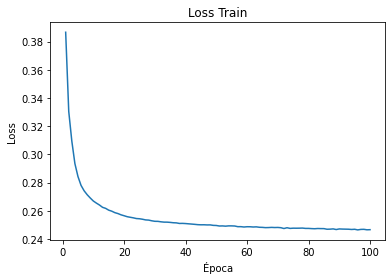

In [59]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [60]:
predictions = model.predict(test_x)

17188/17188 [==============================] - 14s 817us/step


In [61]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [62]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.6499580787835715


### Versión 2:

- Regularization layer: Gaussian Noise (mean = 0)
- Optimizer: Adam
- No normalization layers
- Batch size: 5000
- Droput layer of rate: .1
- Reduced data to 20 features

In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(20,), stddev=0), #input
    tf.keras.layers.Dense(60, activation=tf.nn.relu), #hidden1
    tf.keras.layers.Dropout(.1), #hidden2
    tf.keras.layers.Dense(90, activation=tf.nn.tanh), #hidden3
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) #output
])

model.compile(optimizer='Adam',
              loss='binary_crossentropy')

PCA = sklearnPCA(n_components=20).fit(train_x)
PCA_train = PCA.transform(train_x)

history = model.fit(PCA_train, train_y, epochs=100, batch_size=5000, class_weight=class_weight)

Epoch 1/100
50/50 [==============================] - 1s 8ms/step - loss: 0.4230
Epoch 2/100
50/50 [==============================] - 0s 8ms/step - loss: 0.3405
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 0.3198
Epoch 4/100
50/50 [==============================] - 0s 8ms/step - loss: 0.3032
Epoch 5/100
50/50 [==============================] - 0s 9ms/step - loss: 0.2908
Epoch 6/100
50/50 [==============================] - 0s 8ms/step - loss: 0.2826
Epoch 7/100
50/50 [==============================] - 0s 8ms/step - loss: 0.2770
Epoch 8/100
50/50 [==============================] - 0s 8ms/step - loss: 0.2734
Epoch 9/100
50/50 [==============================] - 0s 10ms/step - loss: 0.2703
Epoch 10/100
50/50 [==============================] - 0s 9ms/step - loss: 0.2681
Epoch 11/100
50/50 [==============================] - 0s 8ms/step - loss: 0.2662
Epoch 12/100
50/50 [==============================] - 0s 8ms/step - loss: 0.2644
Epoch 13/100
50/50 [================

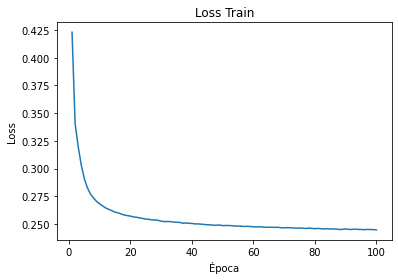

In [64]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [65]:
PCA_test = PCA.transform(test_x)
predictions = model.predict(PCA_test)

17188/17188 [==============================] - 13s 750us/step


In [66]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [67]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.6472962864554157


### Versión 3:

- Regularization layer: Gaussian Noise (mean = 0)
- Optimizer: RMS Prop
- No normalization layers
- Batch size: 2500
- Dropout layer of rate: .1
- Reduced data to 20 features

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(20,), stddev=0), #input
    tf.keras.layers.Dense(60, activation=tf.nn.relu), #hidden1
    tf.keras.layers.Dropout(.1), #hidden2
    tf.keras.layers.Dense(90, activation=tf.nn.tanh), #hidden3
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) #output
])

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy')

PCA = sklearnPCA(n_components=20).fit(train_x)
PCA_train = PCA.transform(train_x)

history = model.fit(PCA_train, train_y, epochs=100, batch_size=2500, class_weight=class_weight)

Epoch 1/100
100/100 [==============================] - 1s 5ms/step - loss: 0.3309
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2915
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2769
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2695
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2647
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2617
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2592
Epoch 8/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2574
Epoch 9/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2560
Epoch 10/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2548
Epoch 11/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2539
Epoch 12/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2536
Epoch 13/100


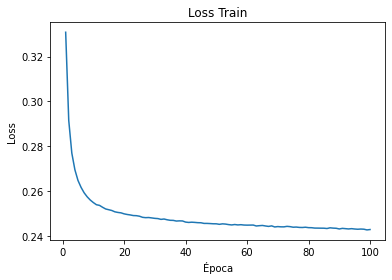

In [69]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [70]:
PCA_test = PCA.transform(test_x)
predictions = model.predict(PCA_test)

17188/17188 [==============================] - 13s 745us/step


In [71]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [72]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.625491689494045


### Versión 4:

- Regularization layer: Gaussian Noise (mean = 0)
- Optimizer: RMSprop
- Normalization layer: BatchNormalization
- Batch size: 5000
- No dropout layers
- Reduced data to 20 features

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(20,), stddev=0), #input
    tf.keras.layers.Dense(60, activation=tf.nn.relu), #hidden1
    tf.keras.layers.BatchNormalization(), #hidden2
    tf.keras.layers.Dense(90, activation=tf.nn.tanh), #hidden3
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) #output
])

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy')

PCA = sklearnPCA(n_components=20).fit(train_x)
PCA_train = PCA.transform(train_x)

history = model.fit(PCA_train, train_y, epochs=100, batch_size=5000, class_weight=class_weight)

Epoch 1/100
50/50 [==============================] - 1s 10ms/step - loss: 0.3727
Epoch 2/100
50/50 [==============================] - 0s 10ms/step - loss: 0.2984
Epoch 3/100
50/50 [==============================] - 0s 9ms/step - loss: 0.2803
Epoch 4/100
50/50 [==============================] - 0s 10ms/step - loss: 0.2693
Epoch 5/100
50/50 [==============================] - 0s 9ms/step - loss: 0.2629
Epoch 6/100
50/50 [==============================] - 0s 10ms/step - loss: 0.2592
Epoch 7/100
50/50 [==============================] - 1s 11ms/step - loss: 0.2569
Epoch 8/100
50/50 [==============================] - 1s 12ms/step - loss: 0.2550
Epoch 9/100
50/50 [==============================] - 0s 10ms/step - loss: 0.2535
Epoch 10/100
50/50 [==============================] - 1s 11ms/step - loss: 0.2523
Epoch 11/100
50/50 [==============================] - 1s 10ms/step - loss: 0.2513
Epoch 12/100
50/50 [==============================] - 0s 10ms/step - loss: 0.2505
Epoch 13/100
50/50 [=======

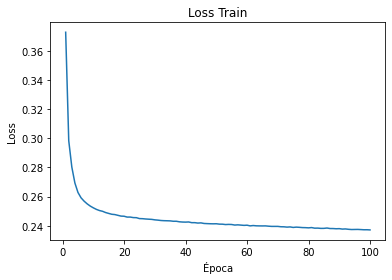

In [74]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [75]:
PCA_test = PCA.transform(test_x)
predictions = model.predict(PCA_test)

17188/17188 [==============================] - 14s 824us/step


In [76]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [77]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.6027140041520522


### Versión 5:

- Regularization layer: Gaussian Noise (mean = 0)
- Optimizer: RMSprop
- Normalization layer: LayerNormalization
- Batch size: 5000
- No dropout layers
- Reduced data to 20 features

In [78]:
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(20,), stddev=0), #input
    tf.keras.layers.Dense(60, activation=tf.nn.relu), #hidden1
    tf.keras.layers.LayerNormalization(), #hidden2
    tf.keras.layers.Dense(90, activation=tf.nn.tanh), #hidden3
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) #output
])

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy')

PCA = sklearnPCA(n_components=20).fit(train_x)
PCA_train = PCA.transform(train_x)

history = model.fit(PCA_train, train_y, epochs=100, batch_size=5000, class_weight=class_weight)

Epoch 1/100
50/50 [==============================] - 1s 12ms/step - loss: 0.3536
Epoch 2/100
50/50 [==============================] - 1s 12ms/step - loss: 0.2999
Epoch 3/100
50/50 [==============================] - 1s 12ms/step - loss: 0.2821
Epoch 4/100
50/50 [==============================] - 1s 13ms/step - loss: 0.2720
Epoch 5/100
50/50 [==============================] - 1s 12ms/step - loss: 0.2661
Epoch 6/100
50/50 [==============================] - 1s 13ms/step - loss: 0.2623
Epoch 7/100
50/50 [==============================] - 1s 13ms/step - loss: 0.2596
Epoch 8/100
50/50 [==============================] - 1s 12ms/step - loss: 0.2574
Epoch 9/100
50/50 [==============================] - 1s 12ms/step - loss: 0.2557
Epoch 10/100
50/50 [==============================] - 1s 12ms/step - loss: 0.2543
Epoch 11/100
50/50 [==============================] - 1s 13ms/step - loss: 0.2535
Epoch 12/100
50/50 [==============================] - 1s 13ms/step - loss: 0.2522
Epoch 13/100
50/50 [=====

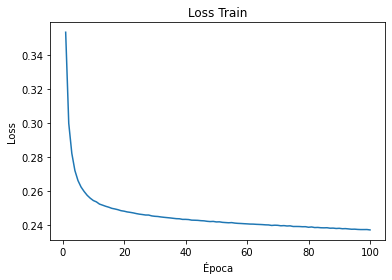

In [79]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [80]:
PCA_test = PCA.transform(test_x)
predictions = model.predict(PCA_test)

17188/17188 [==============================] - 15s 858us/step


In [81]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [82]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.566831256927449


## Red Neuronal de 5 Capas Ocultas

### Versión 1:

- No regularization layers
- Optimizer: RMS prop
- Normalization layer: LayerNormalization
- Batch size: 5000
- Droput layer of rate: .1
- Full data

In [83]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(30,)), #input
    tf.keras.layers.Dense(60, activation=tf.nn.relu), #hidden1
    tf.keras.layers.Dropout(.1), #hidden2
    tf.keras.layers.Dense(60, activation=tf.nn.relu), #hidden3
    tf.keras.layers.LayerNormalization(), #hidden4
    tf.keras.layers.Dense(90, activation=tf.nn.tanh), #hidden5
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) #output
])

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy')

history = model.fit(train_x, train_y, epochs=100, batch_size=5000, class_weight=class_weight)

Epoch 1/100
50/50 [==============================] - 1s 15ms/step - loss: 0.3421
Epoch 2/100
50/50 [==============================] - 1s 15ms/step - loss: 0.3007
Epoch 3/100
50/50 [==============================] - 1s 15ms/step - loss: 0.2836
Epoch 4/100
50/50 [==============================] - 1s 15ms/step - loss: 0.2746
Epoch 5/100
50/50 [==============================] - 1s 15ms/step - loss: 0.2695
Epoch 6/100
50/50 [==============================] - 1s 15ms/step - loss: 0.2660
Epoch 7/100
50/50 [==============================] - 1s 16ms/step - loss: 0.2632
Epoch 8/100
50/50 [==============================] - 1s 16ms/step - loss: 0.2613
Epoch 9/100
50/50 [==============================] - 1s 16ms/step - loss: 0.2600
Epoch 10/100
50/50 [==============================] - 1s 17ms/step - loss: 0.2586
Epoch 11/100
50/50 [==============================] - 1s 16ms/step - loss: 0.2576
Epoch 12/100
50/50 [==============================] - 1s 16ms/step - loss: 0.2566
Epoch 13/100
50/50 [=====

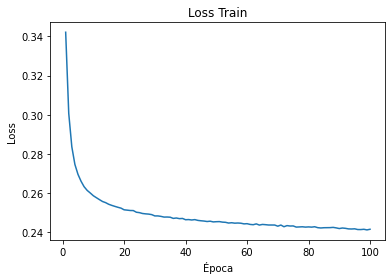

In [84]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [85]:
predictions = model.predict(test_x)

17188/17188 [==============================] - 15s 896us/step


In [86]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [87]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.6056463086356443


### Versión 2:

- Regularization layer: Gaussian Noise (mean = 0)
- Optimizer: RMS prop
- Normalization layer: LayerNormalization
- Batch size: 5000
- Droput layer of rate: .1
- Reduced data to 20 features

In [88]:
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(20,), stddev=0), #input
    tf.keras.layers.Dense(60, activation=tf.nn.relu), #hidden1
    tf.keras.layers.Dropout(.1), #hidden2
    tf.keras.layers.Dense(60, activation=tf.nn.relu), #hidden3
    tf.keras.layers.LayerNormalization(), #hidden4
    tf.keras.layers.Dense(90, activation=tf.nn.tanh), #hidden5
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) #output
])

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy')

PCA = sklearnPCA(n_components=20).fit(train_x)
PCA_train = PCA.transform(train_x)

history = model.fit(PCA_train, train_y, epochs=100, batch_size=5000, class_weight=class_weight)

Epoch 1/100
50/50 [==============================] - 2s 15ms/step - loss: 0.3560
Epoch 2/100
50/50 [==============================] - 1s 15ms/step - loss: 0.3114
Epoch 3/100
50/50 [==============================] - 1s 15ms/step - loss: 0.2934
Epoch 4/100
50/50 [==============================] - 1s 14ms/step - loss: 0.2830
Epoch 5/100
50/50 [==============================] - 1s 15ms/step - loss: 0.2749
Epoch 6/100
50/50 [==============================] - 1s 15ms/step - loss: 0.2694
Epoch 7/100
50/50 [==============================] - 1s 15ms/step - loss: 0.2662
Epoch 8/100
50/50 [==============================] - 1s 15ms/step - loss: 0.2632
Epoch 9/100
50/50 [==============================] - 1s 14ms/step - loss: 0.2606
Epoch 10/100
50/50 [==============================] - 1s 15ms/step - loss: 0.2594
Epoch 11/100
50/50 [==============================] - 1s 15ms/step - loss: 0.2578
Epoch 12/100
50/50 [==============================] - 1s 14ms/step - loss: 0.2565
Epoch 13/100
50/50 [=====

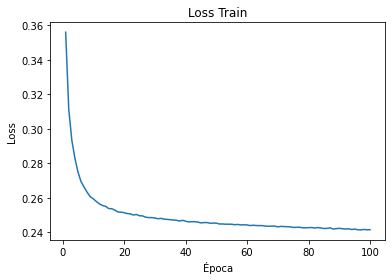

In [89]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [90]:
PCA_test = PCA.transform(test_x)
predictions = model.predict(PCA_test)

17188/17188 [==============================] - 15s 874us/step


In [91]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [92]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.6289269849245076


### Versión 3:

- Regularization layer: Gaussian Noise (mean = 0)
- Optimizer: Adam
- Normalization layer: BatchNormalization
- Batch size: 5000
- Dropout layer of rate: .1
- Reduced data to 20 features

In [93]:
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(20,), stddev=0), #input
    tf.keras.layers.Dense(60, activation=tf.nn.tanh), #hidden1
    tf.keras.layers.BatchNormalization(), #hidden2
    tf.keras.layers.Dense(90, activation=tf.nn.relu), #hidden3
    tf.keras.layers.Dropout(.1), #hidden4
    tf.keras.layers.Dense(30, activation=tf.nn.tanh), #hidden5
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) #output
])

model.compile(optimizer='Adam',
              loss='binary_crossentropy')

PCA = sklearnPCA(n_components=20).fit(train_x)
PCA_train = PCA.transform(train_x)

history = model.fit(PCA_train, train_y, epochs=100, batch_size=5000, class_weight=class_weight)

Epoch 1/100
50/50 [==============================] - 1s 13ms/step - loss: 0.3798
Epoch 2/100
50/50 [==============================] - 1s 14ms/step - loss: 0.3094
Epoch 3/100
50/50 [==============================] - 1s 13ms/step - loss: 0.2826
Epoch 4/100
50/50 [==============================] - 1s 13ms/step - loss: 0.2700
Epoch 5/100
50/50 [==============================] - 1s 13ms/step - loss: 0.2644
Epoch 6/100
50/50 [==============================] - 1s 13ms/step - loss: 0.2613
Epoch 7/100
50/50 [==============================] - 1s 13ms/step - loss: 0.2589
Epoch 8/100
50/50 [==============================] - 1s 13ms/step - loss: 0.2571
Epoch 9/100
50/50 [==============================] - 1s 12ms/step - loss: 0.2558
Epoch 10/100
50/50 [==============================] - 1s 13ms/step - loss: 0.2548
Epoch 11/100
50/50 [==============================] - 1s 13ms/step - loss: 0.2540
Epoch 12/100
50/50 [==============================] - 1s 13ms/step - loss: 0.2533
Epoch 13/100
50/50 [=====

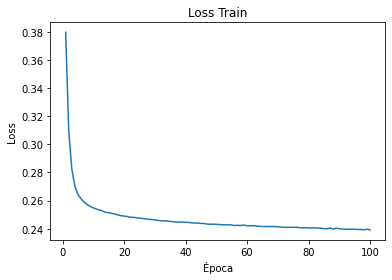

In [94]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [95]:
PCA_test = PCA.transform(test_x)
predictions = model.predict(PCA_test)

17188/17188 [==============================] - 13s 740us/step


In [96]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [97]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.6496488618223184


### Versión 4:

- Regularization layer: Gaussian Noise (mean = 0)
- Optimizer: Adamax
- Normalization layer: LayerNormalization
- Batch size: 5000
- Dropout of rate: .15
- Reduced data to 20 features

In [98]:
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(20,), stddev=0), #input
    tf.keras.layers.Dense(60, activation=tf.nn.tanh), #hidden1
    tf.keras.layers.Dropout(.15), #hidden2
    tf.keras.layers.Dense(90, activation=tf.nn.relu), #hidden3
    tf.keras.layers.LayerNormalization(), #hidden4
    tf.keras.layers.Dense(60, activation=tf.nn.tanh), #hidden5
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) #output
])

model.compile(optimizer='Adamax',
              loss='binary_crossentropy')

PCA = sklearnPCA(n_components=20).fit(train_x)
PCA_train = PCA.transform(train_x)

history = model.fit(PCA_train, train_y, epochs=100, batch_size=5000, class_weight=class_weight)

Epoch 1/100
50/50 [==============================] - 1s 18ms/step - loss: 0.3764
Epoch 2/100
50/50 [==============================] - 1s 18ms/step - loss: 0.3222
Epoch 3/100
50/50 [==============================] - 1s 18ms/step - loss: 0.3054
Epoch 4/100
50/50 [==============================] - 1s 18ms/step - loss: 0.2932
Epoch 5/100
50/50 [==============================] - 1s 18ms/step - loss: 0.2861
Epoch 6/100
50/50 [==============================] - 1s 18ms/step - loss: 0.2815
Epoch 7/100
50/50 [==============================] - 1s 18ms/step - loss: 0.2784
Epoch 8/100
50/50 [==============================] - 1s 18ms/step - loss: 0.2759
Epoch 9/100
50/50 [==============================] - 1s 18ms/step - loss: 0.2730
Epoch 10/100
50/50 [==============================] - 1s 18ms/step - loss: 0.2709
Epoch 11/100
50/50 [==============================] - 1s 18ms/step - loss: 0.2690
Epoch 12/100
50/50 [==============================] - 1s 18ms/step - loss: 0.2676
Epoch 13/100
50/50 [=====

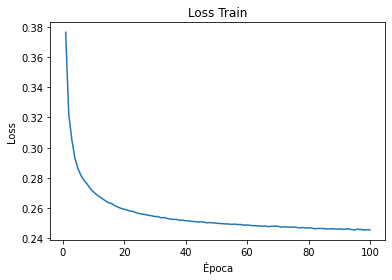

In [99]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [100]:
PCA_test = PCA.transform(test_x)
predictions = model.predict(PCA_test)

17188/17188 [==============================] - 16s 909us/step


In [101]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [102]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.6025824425860242


### Versión 5:

- Regularization layer: Gaussian Noise (mean = 0)
- Optimizer: RMSprop
- Normalization layer: LayerNormalization
- Batch size: 5000
- No dropout layers
- Reduced data to 20 features

In [103]:
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(25,), stddev=0), #input
    tf.keras.layers.Dense(60, activation=tf.nn.relu), #hidden1
    tf.keras.layers.GaussianDropout(.15), #hidden2
    tf.keras.layers.Dense(90, activation=tf.nn.tanh), #hidden3
    tf.keras.layers.LayerNormalization(), #hidden4
    tf.keras.layers.Dense(60, activation=tf.nn.relu), #hidden5
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) #output
])

model.compile(optimizer='Nadam',
              loss='binary_crossentropy')

PCA = sklearnPCA(n_components=25).fit(train_x)
PCA_train = PCA.transform(train_x)

history = model.fit(PCA_train, train_y, epochs=100, batch_size=2500, class_weight=class_weight)

Epoch 1/100
100/100 [==============================] - 2s 8ms/step - loss: 0.3303
Epoch 2/100
100/100 [==============================] - 1s 8ms/step - loss: 0.2807
Epoch 3/100
100/100 [==============================] - 1s 7ms/step - loss: 0.2679
Epoch 4/100
100/100 [==============================] - 1s 8ms/step - loss: 0.2626
Epoch 5/100
100/100 [==============================] - 1s 8ms/step - loss: 0.2592
Epoch 6/100
100/100 [==============================] - 1s 8ms/step - loss: 0.2571
Epoch 7/100
100/100 [==============================] - 1s 8ms/step - loss: 0.2552
Epoch 8/100
100/100 [==============================] - 1s 8ms/step - loss: 0.2537
Epoch 9/100
100/100 [==============================] - 1s 8ms/step - loss: 0.2531
Epoch 10/100
100/100 [==============================] - 1s 8ms/step - loss: 0.2521
Epoch 11/100
100/100 [==============================] - 1s 8ms/step - loss: 0.2514
Epoch 12/100
100/100 [==============================] - 1s 8ms/step - loss: 0.2508
Epoch 13/100


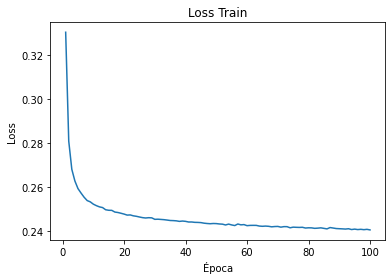

In [104]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [105]:
PCA_test = PCA.transform(test_x)
predictions = model.predict(PCA_test)

17188/17188 [==============================] - 16s 906us/step


In [106]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [107]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.626713820021444


## Conclusiones y Comentarios

A partir de las varias implementaciones de las redes neuronales podemos sacar varias conclusiones:

- Para los layers de dropout parece mejorar el score de los modelos pero en ratios bajos que aparecen en alguno de los modelos.
- Tuvimos más mejoras al colocar una regularización de ruido gaussiano mientras que otros métodos como "l1 (lasso)" y "l2 (ridge)" no parecían tener el mismo efecto.
- Las capas de normalización no parecen tener mucho efecto en el resultado pero preferiríamos usar LayerNormalization sobre BatchNormalization (hablando sobre capas de normalización en keras).
- El tamaño del batch si que tuvo un gran efecto en el score de los modelos por lo menos aumentar de 1000 a 5000 aumento en gran cantidad el score obtenido.
- Probamos varios optimizadores y obtuvimos mejores resultados al pasar al optimizador "Adam" o "RMSprop".
- Tuvimos mejoras al reducir dimensionalmente la data pero reducirla mucho empeora el resultado nosotros diriamos como máximo reducirla a 20 features.
- Hacer redes neuronales de 3 capas fue la que mejor nos resultó, 1 capa parece faltarle más tratamiento a la data o no es lo suficientemente potente y 5 capas no parece haber mejoras en relación a 3 capas tal vez debido a que no jugamos con más capas de activación o no probamos más números de neuronas en las capas.
- Hablando de las capas de activación la sigmoide fue elegida como capa de salida debido a su rango [0,1] que es lo que necesitamos para un problema de casificación binaria mientras que las demás fueron para hacer pruebas.

## Extra: Sin tratamiento del desbalanceo

Aquí se muestra un caso de los que se mostró anteriormente sin el uso de la variable "class_weight"

In [108]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(30,)), #input
    tf.keras.layers.Dense(60, activation=tf.nn.relu), #hidden1
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) #output
])

model.compile(optimizer='SGD',
              loss='binary_crossentropy')

history = model.fit(train_x, train_y, epochs=100, batch_size=1000)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5999
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5389
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5190
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5079
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4997
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4929
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4867
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4809
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4754
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4702
Epoch 11/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4652
Epoch 12/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4605
Epoch 13/100


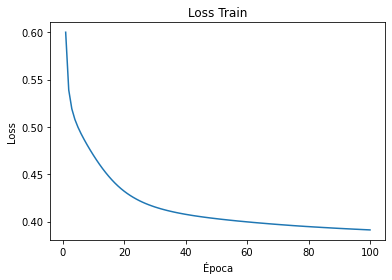

In [109]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [110]:
predictions = model.predict(test_x)

17188/17188 [==============================] - 11s 661us/step


In [111]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in predictions]

In [112]:
print("AMS score:", score(test_y, model_predictions))

AMS score: 2.226493547426667


# Tarea 2-3: Perros y Gatos


Celdas para obtener la data de kaggle, ignorar si se tiene el *dogs-vs-cats.zip*
Si se ejecuta esta celda, es necesario el kaggle.json (API key kaggle)

In [113]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c dogs-vs-cats

     ---------------------------------------- 59.0/59.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 78.2/78.2 kB 4.2 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=e98d0456251036a1703c08ef665597ff12023ac75bca8c1d30f12a25a60784f0
  Stored in directory: c:\users\basti\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.
Traceback (most recent call last):
  File "C:\Users\basti\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\basti\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\basti\AppData\Local\Programs\Python\Python39\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\basti\AppData\Local\Programs\Python\Python39\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "C:\Users\basti\AppData\Local\Programs\Python\Python39\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s 

In [114]:
#Variables para el problema

zip = "dogs-vs-cats.zip"
PATH = "/content" 
train_dir = "train"
test_dir = "test1"
tamaño_batch = 150
epochs = 30
FIG_SIZE=150

In [115]:
zip_files = ['test1', 'train']


with zipfile.ZipFile(zip,"r") as zip_ref:
    zip_ref.extractall("")

for zip_file in zip_files:
    with zipfile.ZipFile("{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} descomprimido".format(zip_file))

FileNotFoundError: [Errno 2] No such file or directory: 'dogs-vs-cats.zip'

In [ ]:
df = pd.DataFrame()
fnames = os.listdir(train_dir)

class_name = []
for name in fnames:
    class_name.append(name.split('.')[0])

data = {'filename':fnames,'category':class_name}
df = pd.DataFrame(data)
df = df.sample(frac=1)
df

,filename,category
20043,cat.3398.jpg,cat
4363,dog.3440.jpg,dog
20906,dog.5851.jpg,dog
23413,cat.6214.jpg,cat
14162,cat.824.jpg,cat
...,...,...
23779,cat.125.jpg,cat
1008,dog.5914.jpg,dog
16059,cat.4394.jpg,cat
2422,cat.6578.jpg,cat


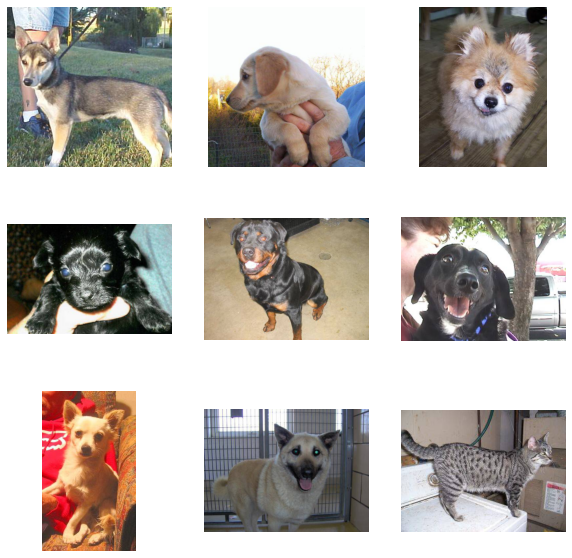

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        image = load_img("train/"+fnames[i])
        plt.imshow(image)
        #plt.title(int(labels[i]))
        plt.axis("off")

1) Como se puede observar, se tiene un conjunto de imagenes que corresponden a perros y gatos. Se procede a crear un dataset en donde se tiene el nombre de la imagen y la categoria de la imagen, que puede ser un gato o un perro. Observando el leaderboard, el mejor score tiene 0.98914, en donde las medallas estan distribuidas por los scores:  



*   Medalla de oro: entre 0.98914 y 0.97851 score
*   Medalla de plata: entre 0.97771 y 0.96274 score
*   Medalla de bronce: entre 0.96251 y 0.83748 score



In [ ]:
df_train, df_test = train_test_split(df , train_size=0.30, test_size=0.20, random_state=42069777)
df_train

,filename,category
23386,cat.4192.jpg,cat
9207,cat.387.jpg,cat
18779,dog.8246.jpg,dog
14123,dog.827.jpg,dog
12687,dog.1916.jpg,dog
...,...,...
23711,cat.3616.jpg,cat
12199,dog.10767.jpg,dog
7416,dog.11888.jpg,dog
12168,cat.5457.jpg,cat


Creación del CNN  
Se usan capas de convolución, MaxPooling y Densas

In [ ]:
modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(FIG_SIZE, FIG_SIZE, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


modeloCNN.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Creación de los Traning/Test Generator

In [ ]:
train_datagen= ImageDataGenerator(
      rescale=1./255,
)

train_datagenerator=train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=PATH + "/train",
                                                     x_col="filename",
                                                     y_col="category",
                                                     target_size=(FIG_SIZE, FIG_SIZE),
                                                     class_mode="binary",
                                                     batch_size=tamaño_batch)

Found 7500 validated image filenames belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_datagenerator=test_datagen.flow_from_dataframe(dataframe=df_test,
                                                   directory=PATH + "/train", 
                                                   x_col="filename",
                                                   y_col="category",
                                                   target_size=(FIG_SIZE, FIG_SIZE),
                                                   class_mode="binary",
                                                   batch_size=tamaño_batch)


Found 5000 validated image filenames belonging to 2 classes.


Entrenamiento de la CNN

In [ ]:
History = modeloCNN.fit(train_datagenerator,
                       epochs=epochs,
                       validation_data=test_datagenerator,
                       validation_steps=df_test.shape[0]//tamaño_batch,
                       steps_per_epoch=df_train.shape[0]//tamaño_batch)

modeloCNN.save_weights("model.h5")

Epoch 1/30
50/50 [==============================] - 57s 785ms/step - loss: 0.7499 - accuracy: 0.5287 - val_loss: 0.6521 - val_accuracy: 0.6131
Epoch 2/30
50/50 [==============================] - 42s 852ms/step - loss: 0.6449 - accuracy: 0.6201 - val_loss: 0.6035 - val_accuracy: 0.6667
Epoch 3/30
50/50 [==============================] - 37s 737ms/step - loss: 0.5771 - accuracy: 0.6961 - val_loss: 0.5329 - val_accuracy: 0.7398
Epoch 4/30
50/50 [==============================] - 36s 721ms/step - loss: 0.5401 - accuracy: 0.7235 - val_loss: 0.5186 - val_accuracy: 0.7410
Epoch 5/30
50/50 [==============================] - 34s 680ms/step - loss: 0.5112 - accuracy: 0.7459 - val_loss: 0.5053 - val_accuracy: 0.7568
Epoch 6/30
50/50 [==============================] - 33s 670ms/step - loss: 0.4769 - accuracy: 0.7655 - val_loss: 0.4713 - val_accuracy: 0.7725
Epoch 7/30
50/50 [==============================] - 34s 680ms/step - loss: 0.4385 - accuracy: 0.7956 - val_loss: 0.4529 - val_accuracy: 0.7824

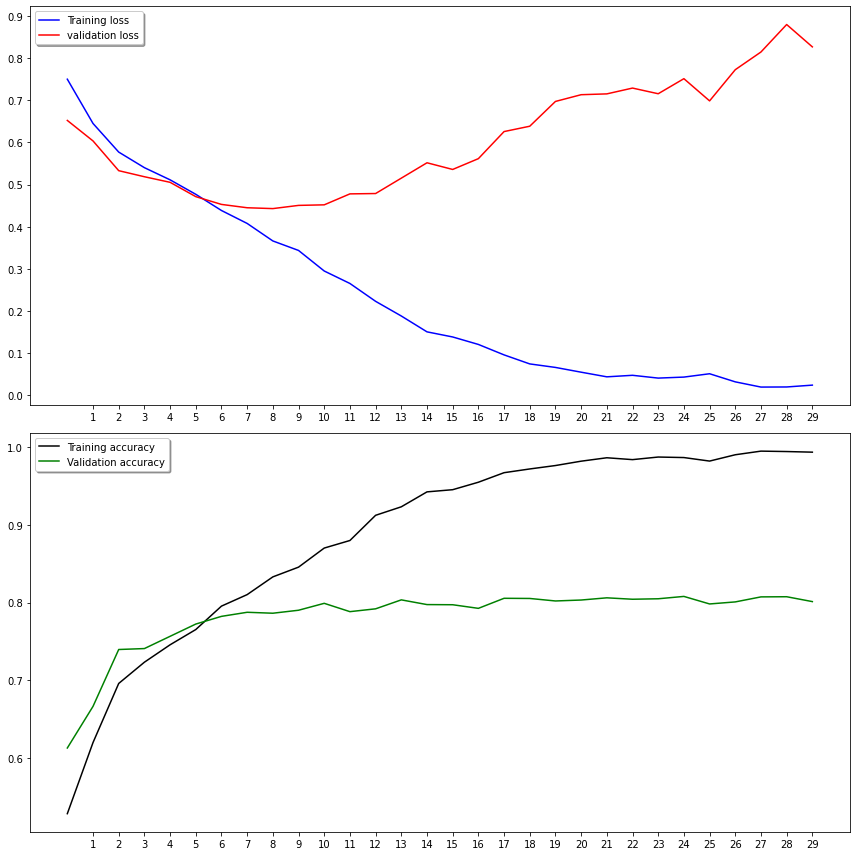

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(History.history['loss'], color='b', label="Training loss")
ax1.plot(History.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))


ax2.plot(History.history['accuracy'], color='k', label="Training accuracy")
ax2.plot(History.history['val_accuracy'], color='g',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

ax1.legend(loc='best', shadow=True)
ax2.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

2) La primera RedCNN presenta un claro sobreajuste con respecto al entrenamiento que este posee en donde, por el lado de la precisión al final del epoch 30 presenta casi un 100% de esta con respecto a los datos de entrenamiento, sin embargo con respecto a los datos de validación, este se estanca cercano al epoch 10 mostrando que claramente solo conoce o se aprendió "de memoria" los datos presentados en el set de práctica sin dar certeza de que este pueda reconocer imágenes fuera de este conjunto. Esto se puede corroborar observando la pérdida en cuanto al conjunto de entrenamiento se acerca a 0 dando a conocer su casi nulo error con respecto a este conjunto, mientras que para los datos de validación se puede apreciar una clara tendencia al aumento de pérdida demostrando que el modelo no garantiza un reconocimiento de las imágenes que se le puedan entregar.

4) Para nuestro primer Aumento de datos, solo consideramos un rango para cambiar la rotación y zoom de las imágenes.

In [ ]:
train_datagen= ImageDataGenerator(
      rescale=1./255,
      rotation_range=25,
      zoom_range=0.15,

)

train_datagenerator=train_datagen.flow_from_dataframe(dataframe=df_train,
                                                     directory=PATH + "/train",
                                                     x_col="filename",
                                                     y_col="category",
                                                     target_size=(FIG_SIZE, FIG_SIZE),
                                                     class_mode="binary",
                                                     batch_size=tamaño_batch)

Found 7500 validated image filenames belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_datagenerator=test_datagen.flow_from_dataframe(dataframe=df_test,
                                                   directory=PATH + "/train", 
                                                   x_col="filename",
                                                   y_col="category",
                                                   target_size=(FIG_SIZE, FIG_SIZE),
                                                   class_mode="binary",
                                                   batch_size=tamaño_batch)


Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
modeloCNN_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(FIG_SIZE, FIG_SIZE, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


modeloCNN_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN_AD.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
History_AD = modeloCNN_AD.fit(train_datagenerator,
                       epochs=epochs,
                       validation_data=test_datagenerator,
                       validation_steps=df_test.shape[0]//tamaño_batch,
                       steps_per_epoch=df_train.shape[0]//tamaño_batch)

modeloCNN_AD.save_weights("model_AD.h5")

Epoch 1/30
50/50 [==============================] - 63s 1s/step - loss: 0.7304 - accuracy: 0.5252 - val_loss: 0.6552 - val_accuracy: 0.6198
Epoch 2/30
50/50 [==============================] - 63s 1s/step - loss: 0.6646 - accuracy: 0.5899 - val_loss: 0.6099 - val_accuracy: 0.6976
Epoch 3/30
50/50 [==============================] - 63s 1s/step - loss: 0.6093 - accuracy: 0.6724 - val_loss: 0.5739 - val_accuracy: 0.6907
Epoch 4/30
50/50 [==============================] - 62s 1s/step - loss: 0.5829 - accuracy: 0.6916 - val_loss: 0.5321 - val_accuracy: 0.7382
Epoch 5/30
50/50 [==============================] - 62s 1s/step - loss: 0.5573 - accuracy: 0.7113 - val_loss: 0.5006 - val_accuracy: 0.7568
Epoch 6/30
50/50 [==============================] - 63s 1s/step - loss: 0.5284 - accuracy: 0.7316 - val_loss: 0.5292 - val_accuracy: 0.7380
Epoch 7/30
50/50 [==============================] - 62s 1s/step - loss: 0.5110 - accuracy: 0.7492 - val_loss: 0.4953 - val_accuracy: 0.7590
Epoch 8/30
50/50 [==

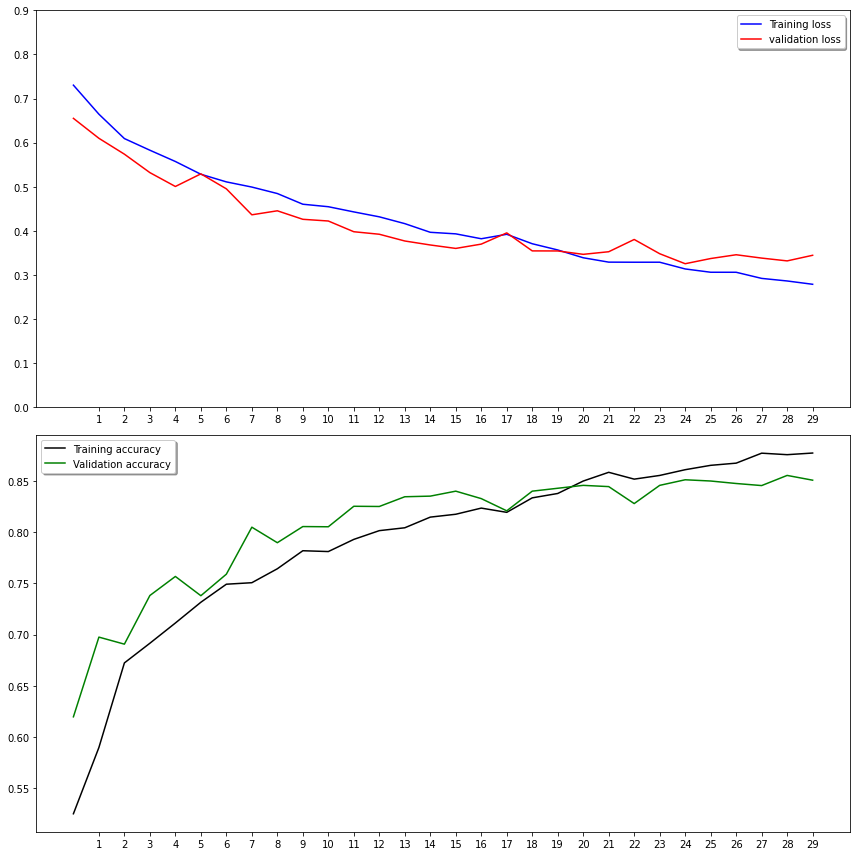

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(History_AD.history['loss'], color='b', label="Training loss")
ax1.plot(History_AD.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))


ax2.plot(History_AD.history['accuracy'], color='k', label="Training accuracy")
ax2.plot(History_AD.history['val_accuracy'], color='g',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

ax1.legend(loc='best', shadow=True)
ax2.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

Luego, para nuestro segundo aumento de datos: A todas las imágenes se les da un rango, en donde aleatoriamente se elige un numero de este rango, para editar parametros como: zoom, rotación (en grados), brillo y corte de la imagen. También se aplica un flip horizontal. Mostramos unas muestras con este Aumento de Datos

Found 7500 validated image filenames belonging to 2 classes.


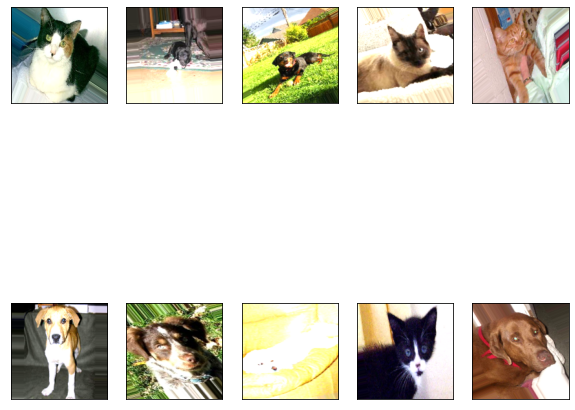

In [ ]:
train_datagen= ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      zoom_range=0.40,
      shear_range=0.2,
      horizontal_flip=True,
      brightness_range= (1,2)

)

train_datagenerator=train_datagen.flow_from_dataframe(dataframe=df_train,
                                                     directory=PATH + "/train",
                                                     x_col="filename",
                                                     y_col="category",
                                                     target_size=(FIG_SIZE, FIG_SIZE),
                                                     class_mode="binary",
                                                     batch_size=tamaño_batch)
plt.figure(figsize=(10, 10))

for imagen, etiqueta in train_datagenerator:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i], cmap="gray")
  break

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_datagenerator=test_datagen.flow_from_dataframe(dataframe=df_test,
                                                   directory=PATH + "/train", 
                                                   x_col="filename",
                                                   y_col="category",
                                                   target_size=(FIG_SIZE, FIG_SIZE),
                                                   class_mode="binary",
                                                   batch_size=tamaño_batch)


Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
modeloCNN_AD2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(FIG_SIZE, FIG_SIZE, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


modeloCNN_AD2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN_AD2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
History_AD2 = modeloCNN_AD2.fit(train_datagenerator,
                       epochs=epochs,
                       validation_data=test_datagenerator,
                       validation_steps=df_test.shape[0]//tamaño_batch,
                       steps_per_epoch=df_train.shape[0]//tamaño_batch)

Epoch 1/30
50/50 [==============================] - 72s 1s/step - loss: 0.7713 - accuracy: 0.5169 - val_loss: 0.6894 - val_accuracy: 0.5424
Epoch 2/30
50/50 [==============================] - 70s 1s/step - loss: 0.6709 - accuracy: 0.5896 - val_loss: 0.6507 - val_accuracy: 0.6145
Epoch 3/30
50/50 [==============================] - 70s 1s/step - loss: 0.6433 - accuracy: 0.6321 - val_loss: 0.5934 - val_accuracy: 0.6962
Epoch 4/30
50/50 [==============================] - 70s 1s/step - loss: 0.6262 - accuracy: 0.6509 - val_loss: 0.5861 - val_accuracy: 0.6982
Epoch 5/30
50/50 [==============================] - 70s 1s/step - loss: 0.6062 - accuracy: 0.6684 - val_loss: 0.5401 - val_accuracy: 0.7440
Epoch 6/30
50/50 [==============================] - 71s 1s/step - loss: 0.5791 - accuracy: 0.6965 - val_loss: 0.5412 - val_accuracy: 0.7208
Epoch 7/30
50/50 [==============================] - 71s 1s/step - loss: 0.5723 - accuracy: 0.7016 - val_loss: 0.5686 - val_accuracy: 0.7010
Epoch 8/30
50/50 [==

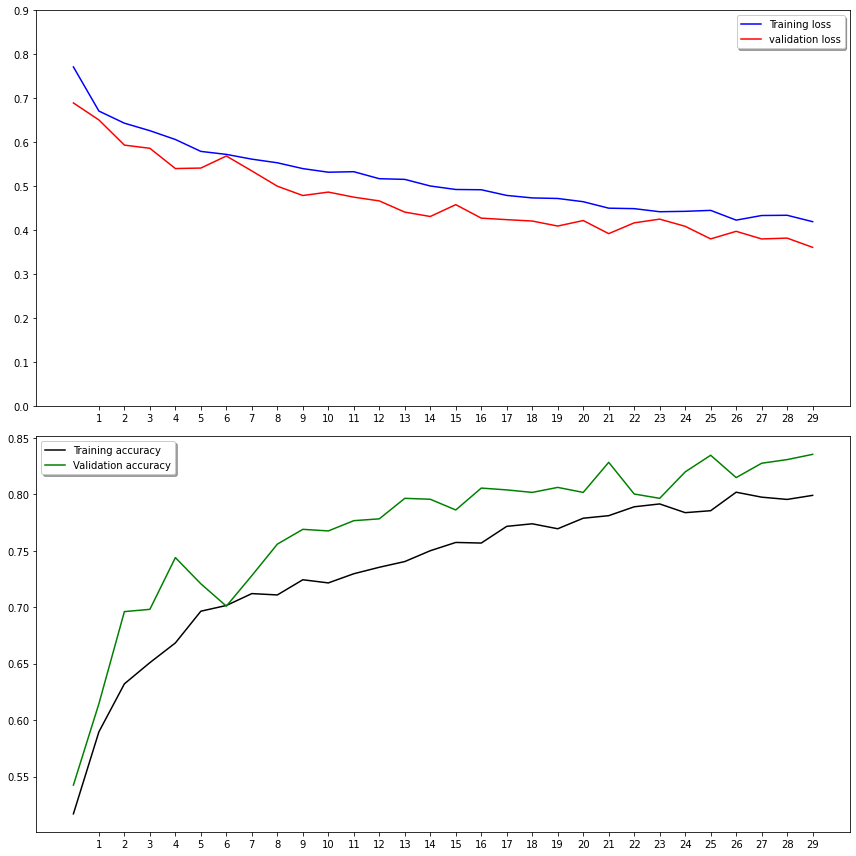

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(History_AD2.history['loss'], color='b', label="Training loss")
ax1.plot(History_AD2.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))


ax2.plot(History_AD2.history['accuracy'], color='k', label="Training accuracy")
ax2.plot(History_AD2.history['val_accuracy'], color='g',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

ax1.legend(loc='best', shadow=True)
ax2.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

Para ambas RedesCNN que posee un aumento de datos se puede ver una similitud en los valores de precisión y pérdida con respecto a sus respectivas validaciones con lo cual, se puede ver que el modelo puede reconocer una imagen externa a su conjunto de práctica gracias al aumento de datos por medio de múltiples parámetros que alteran las imágenes de práctica original. Ante esto se puede agregar que no hay una tendencia clara que muestre que el aumentar alteraciones en los datos mejore la precisión de la red.